# TensorFlow

<table border="1" cellpadding="10" cellspacing="0", >

  <thead>
          <colgroup>
            <col span="1" style="width: 1x;">
            <col span="1" style="width: 2x;">
            <col span="1" style="width: 2x;">
            <tr>
            <th style="background-color: green">Feature</th>
            <th style="background-color: green">TensorFlow 1.x</th>
            <th style="background-color: green">TensorFlow 2.x</th>
    </tr>
        </colgroup> 

  </thead>
  <tbody>
    <tr>
      <td>Ease of Use</td>
      <td>Complex and requires more boilerplate code.</td>
      <td>Simplified and more user-friendly, with less boilerplate.</td>
    </tr>
    <tr>
      <td>Eager Execution</td>
      <td>Not enabled by default.</td>
      <td>Enabled by default, allowing immediate execution of operations.</td>
    </tr>
    <tr>
      <td>API Structure</td>
      <td>Multiple APIs (<code>tf.*, tf.layers.*, tf.contrib.*</code>) can be confusing.</td>
      <td>Unified API, most functionality is under the <code>tf.keras</code> namespace.</td>
    </tr>
    <tr>
      <td><code>tf.Session</code></td>
      <td>Required to execute operations (graphs) in the session.</td>
      <td>Removed; operations run immediately without needing a session.</td>
    </tr>
    <tr>
      <td>Control Flow (if, while)</td>
      <td>Implemented using TensorFlow-specific operations (e.g., <code>tf.cond</code>, <code>tf.while_loop</code>).</td>
      <td>Uses standard Python control flow (e.g., <code>if</code>, <code>while</code>).</td>
    </tr>
    <tr>
      <td>Keras Integration</td>
      <td>Partial, Keras is a separate library.</td>
      <td>Fully integrated, <code>tf.keras</code> is the default high-level API.</td>
    </tr>
    <tr>
      <td>Model Subclassing</td>
      <td>Supported but less intuitive.</td>
      <td>Simplified with <code>tf.keras.Model</code> subclassing.</td>
    </tr>
    <tr>
      <td>Debugging</td>
      <td>Harder to debug due to static graphs.</td>
      <td>Easier to debug with eager execution and integration with tools like <code>pdb</code>.</td>
    </tr>
    <tr>
      <td>Performance</td>
      <td>Optimized for static graph execution.</td>
      <td>Optimized for both eager and graph execution, with better support for custom operations.</td>
    </tr>
    <tr>
      <td>Adoption</td>
      <td>Older, more established, but harder to learn for new users.</td>
      <td>Recommended for new projects, widely adopted in the community.</td>
    </tr>
  </tbody>
</table>


## TensorFlow 2.0 Introduction
In this notebook you will be given an interactive introduction to TensorFlow 2.0. We will walk through the following topics within the TensorFlow module:

- TensorFlow Install and Setup
- Representing Tensors
- Tensor Shape and Rank
- Types of Tensors <br>
and some other operations

If you'd like to follow along without installing TensorFlow on your machine you can use **Google Collaboratory**. Collaboratory is a free Jupyter notebook environment that requires no setup and runs entirely in the cloud.

## Installing TensorFlow
To install TensorFlow on your local machine you can use pip.
```console
pip install tensorflow
```
If you have a CUDA enabled GPU you can install the GPU version of TensorFlow. You will also need to install some other software which can be found here: https://www.tensorflow.org/install/gpu
```console
pip install tensorflow-gpu
```

## Importing TensorFlow
The first step here is going to be to select the correct version of TensorFlow from within collabratory!


In [1]:
import tensorflow as tf  # now import the tensorflow module
print(tf.__version__)  # make sure the version is 2.x

2024-08-30 21:52:12.409219: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-30 21:52:12.452788: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


2.13.1


In [2]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


2024-08-30 21:52:51.895985: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Created device /device:GPU:0 with 1743 MB memory:  -> device: 0, name: NVIDIA GeForce MX230, pci bus id: 0000:01:00.0, compute capability: 6.1


True

## Tensors
"A tensor is a generalization of vectors and matrices to potentially higher dimensions. Internally, TensorFlow represents tensors as n-dimensional arrays of base datatypes." (https://www.tensorflow.org/guide/tensor)

It should't surprise you that tensors are a fundemental apsect of TensorFlow. They are the main objects that are passed around and manipluated throughout the program. Each tensor represents a partialy defined computation that will eventually produce a value. TensorFlow programs work by building a graph of Tensor objects that details how tensors are related. Running different parts of the graph allow results to be generated.

Each tensor has a data type and a shape.

**Data Types Include**: float32, int32, string and others.

**Shape**: Represents the dimension of data.

Just like vectors and matrices tensors can have operations applied to them like addition, subtraction, dot product, cross product etc.

In the next sections we will discuss some different properties of tensors. This is to make you more familiar with how tensorflow represnts data and how you can manipulate this data.


### 1. Creating Tensors
Below is an example of how to create some different tensors.

You simply define the value of the tensor and the datatype and you are good to go! It's worth mentioning that usually we deal with tensors of numeric data, it is quite rare to see string tensors.

For a full list of datatypes please refer to the following guide.

https://www.tensorflow.org/api_docs/python/tf/dtypes/DType?version=stable

 #### 1.1 Creating Tensor with `tf.constant`

In [3]:
# tf.constant : Creates a constant tensor from a tensor-like object.
## It is a scalar, i.e., 0 dimension
scalar = tf.constant(4)
display(scalar)

2024-08-30 21:52:52.175791: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1743 MB memory:  -> device: 0, name: NVIDIA GeForce MX230, pci bus id: 0000:01:00.0, compute capability: 6.1


<tf.Tensor: shape=(), dtype=int32, numpy=4>

In [4]:
# Check the dimensions of scalar
scalar.ndim

0

In [5]:
# Constant 1-D Tensor from a python list.
## It is a vector, i.e., it has 1 dimension
vector = tf.constant([1, 2, 3])
display(vector, f"Dimension = {vector.ndim}")

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([1, 2, 3], dtype=int32)>

'Dimension = 1'

In [6]:
# If dtype is specified, the resulting tensor values are cast to the requested dtype.
vector2 = tf.constant([2, 3, 4], dtype=tf.float16)
display(vector2, f"Dimension = {vector2.ndim}")

<tf.Tensor: shape=(3,), dtype=float16, numpy=array([2., 3., 4.], dtype=float16)>

'Dimension = 1'

In [7]:
# Creating a matrix, i.e., more than 1 dimension
matrix = tf.constant([[1, 2, 3], [4, 5, 6]])
display(matrix, f"Dimension = {matrix.ndim}")

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[1, 2, 3],
       [4, 5, 6]], dtype=int32)>

'Dimension = 2'

In [8]:
# If shape is set, the value is reshaped to match. Scalars are expanded to fill the shape:
matrix2 = tf.constant(2, shape=(3, 2))
display(matrix2, f"Dimension = {matrix2.ndim}")

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[2, 2],
       [2, 2],
       [2, 2]], dtype=int32)>

'Dimension = 2'

In [9]:
tensor = tf.constant(
    [[[1, 2, 3], [2, 3, 4]], [[3, 4, 5], [4, 5, 6]], [[5, 6, 7], [6, 7, 8]]]
)
display(tensor, f"Dimension = {tensor.ndim}")

<tf.Tensor: shape=(3, 2, 3), dtype=int32, numpy=
array([[[1, 2, 3],
        [2, 3, 4]],

       [[3, 4, 5],
        [4, 5, 6]],

       [[5, 6, 7],
        [6, 7, 8]]], dtype=int32)>

'Dimension = 3'

In [10]:
print(f"2 : This is {tf.constant(2).ndim} dimensional tensor")
print(f"[2] : This is {tf.constant([2]).ndim} dimensional tensor")
print(f"[[2]] : This is {tf.constant([[2]]).ndim} dimensional tensor")
print(f"[[[2]]] : This is {tf.constant([[[2]]]).ndim} dimensional tensor")
print(f"[[[[2]]]] : This is {tf.constant([[[[2]]]]).ndim} dimensional tensor")

2 : This is 0 dimensional tensor
[2] : This is 1 dimensional tensor
[[2]] : This is 2 dimensional tensor
[[[2]]] : This is 3 dimensional tensor
[[[[2]]]] : This is 4 dimensional tensor


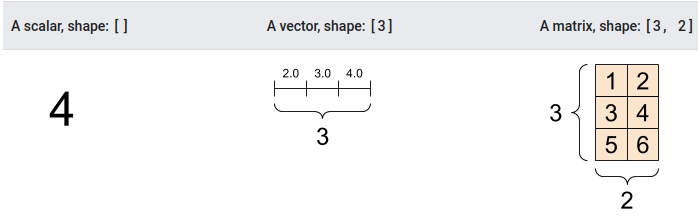 <br>
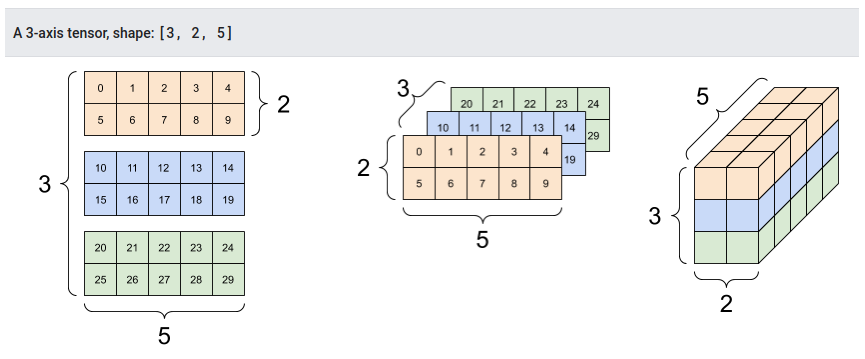 <br>
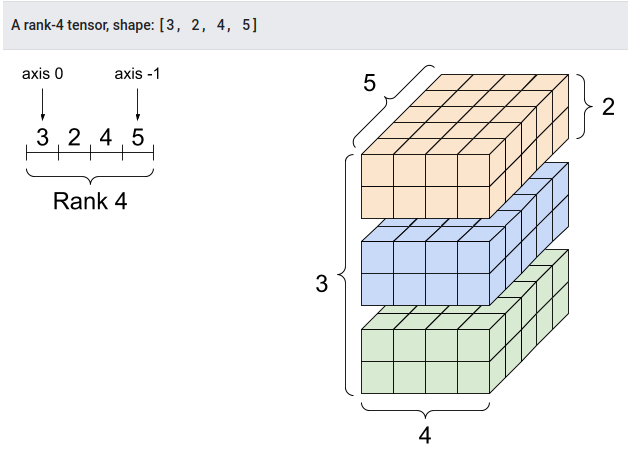

<div style="background-color: lightblue; padding: 10px; border-radius: 5px;">
    <h5 style="color: darkblue;">What we've created is:</h5>
    <ul style="color: black;">
    <li> <b>Scalar</b> : a single number. e.g., The temperature outside right now, e.g., <code>23°C</code>.
<li> <b>Vector</b> : a number with direction. e.g., Temperatures recorded over a week: <code>[23, 25, 21, 22, 24, 26, 23]</code>.
<li> <b>Matrix</b> : a 2-dimensional array of numbers. e.g., sales data for different products across months
<pre><code>[[Jan, Feb, Mar],
 [100, 150, 200],
 [80, 120, 160]]</code></pre>
<li> <b>Tensor</b> : a n-dimensional array of numbers (n can be any no., a 0-dimensional tensor (scalar) or 1-dimensional tensor (vector) etc.)<br>
e.g., <i>3d Tensor</i> : A 28x28 image with 3 color channels (RGB) 
<pre><code>[[[R, G, B], [R, G, B], ...],
 [[R, G, B], [R, G, B], ...],
 ...]</code></pre>
 <i> 4D Tensor </i> : A 4-D tensor adds another dimension, often used to represent a batch of 3-D data.<br> e.g., a video with dimensions <pre><code>[frames, height, width, color channels]</code></pre>, where each element in the tensor represents a pixel in a frame of the video.<p>
<i>5D Tensor</i> : A batch of video clips, where each clip is made up of multiple colored frames. <code>(n, m, p, q, r)</code>, where 

`n` is the number of video clips, 
`m` is the number of frames per clip, 
`p` is the height, 
`q` is the width, 
and `r` is the number of channels.
</ul>
</div>

#### 1.2 Creating Tensor with `tf.Variable`

In [11]:
changable_tensor = tf.Variable([10,7])
unchangable_tensor = tf.constant([10,7])
display(changable_tensor, unchangable_tensor)

<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([10,  7], dtype=int32)>

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([10,  7], dtype=int32)>

In [12]:
# trying to change the changable_tensor
changable_tensor[0].assign(20)
print(changable_tensor)

<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([20,  7], dtype=int32)>


In [13]:
unchangable_tensor[0] = 20

TypeError: 'tensorflow.python.framework.ops.EagerTensor' object does not support item assignment

In [14]:
unchangable_tensor[0].assign(20)

AttributeError: 'tensorflow.python.framework.ops.EagerTensor' object has no attribute 'assign'

In Neural network, there is sometime when we want to change the values of Tensors and sometime doesn't want to change, for this reason, we have `tf.constant` and `tf.Variable`.

> 

<div style="background-color: #dab0b0; padding: 10px; border-radius: 5px;">
       <p style="color:black"> <b>Note:</b>  Rarely in practice will you need to decide whether to use <code>tf.constant</code> or <code>tf.Variable</code> to create tensors, as TensorFlow does this for you. However, if in doubt, use <code>tf.constant</code> and change it later if needed.
</p>
</div>

In [15]:
string = tf.Variable("this is a string", tf.string)
number = tf.Variable(324, dtype = tf.int16)
floating = tf.Variable(3, dtype = tf.float16)
string, number, floating

(<tf.Variable 'Variable:0' shape=() dtype=string, numpy=b'this is a string'>,
 <tf.Variable 'Variable:0' shape=() dtype=int16, numpy=324>,
 <tf.Variable 'Variable:0' shape=() dtype=float16, numpy=3.0>)

#### 1.3 Creating random tensors
During the data processing in Neural Networks, we need to initialize random weights in beginning which get updated later as per the output. <br>
Random tensors are tensors of some arbitrary sizes of random numbers.

In [16]:
# Creating two random (but the same) tensors
random_1 = tf.random.Generator.from_seed(42) # set seed for reproducibility
random_1 = random_1.normal(shape=(3,2)) # generate random numbers from normal distribution
random_1

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[-0.7565803 , -0.06854702],
       [ 0.07595026, -1.2573844 ],
       [-0.23193765, -1.8107855 ]], dtype=float32)>

The `tf.random.Generator` class is used in cases where you want each RNG call to produce different results.

In [17]:
random_2 = tf.random.Generator.from_seed(42)
random_2 = random_2.normal(shape=(3,2))
random_2

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[-0.7565803 , -0.06854702],
       [ 0.07595026, -1.2573844 ],
       [-0.23193765, -1.8107855 ]], dtype=float32)>

In [18]:
# Are they equal??
random_1 == random_2

<tf.Tensor: shape=(3, 2), dtype=bool, numpy=
array([[ True,  True],
       [ True,  True],
       [ True,  True]])>

You can get a `tf.random.Generator` by manually creating an object of the class or call `tf.random.get_global_generator()` to get the default global generator. Yet, the easiest is `Generator.from_seed`, as shown above,

In [19]:
# we can also generate from uniform distribution
random_3 = tf.random.get_global_generator()
display(random_3.uniform(shape=(2,3)))

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[0.59856045, 0.45262623, 0.84917605],
       [0.42981946, 0.68826663, 0.46551085]], dtype=float32)>

#### 1.4 Shuffle the order of elemets in tensor
Especially with imbalanced datasets, shuffling helps to ensure that each batch has a more balanced representation of different classes. This helps the model to learn equally from all classes and not become biased towards any particular class and also prevent overfitting.<p>
If we're trying to animal image classification neural network and we had 10000 images of dogs and 5000 imgs of cat, and our NN saw dogs images first and pattern that it learns maybe too aligned with what's in the dog's image rather than cat image, that's why we want to shuffle the order of images and tensors so that pattern our NN learns tunes to both kind of images unbiased.

In [20]:
# Shuffle a tensor (valuable when you want to shuffle your data so the inherent order of the data doesn't effect learning)
not_shuffled = tf.constant([[10, 7], [3, 4], [2, 5]])
not_shuffled

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[10,  7],
       [ 3,  4],
       [ 2,  5]], dtype=int32)>

In [21]:
tf.random.shuffle(not_shuffled) # randomly shuffle the tensor along its first dimension.

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[ 3,  4],
       [ 2,  5],
       [10,  7]], dtype=int32)>

> for reproducibility, set seed value for both global and operation level

In [22]:
tf.random.set_seed(43) # global level random seed
tf.random.shuffle(not_shuffled, seed=42) # operation level random seed

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[ 3,  4],
       [ 2,  5],
       [10,  7]], dtype=int32)>

#### 1.5 Other ways to make tensor

In [23]:
# Create a tensor of all ones
tf.ones(shape=(3, 2))

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[1., 1.],
       [1., 1.],
       [1., 1.]], dtype=float32)>

In [24]:
# Craete a tensor of all zeros
tf.zeros(shape=[2, 3])

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[0., 0., 0.],
       [0., 0., 0.]], dtype=float32)>

The difference between a NumPy array and a tensor is that the tensors are backed by the accelerator memory like GPU (for faster computing) and they are immutable, unlike NumPy arrays. Otherwise they are very similar.

In [25]:
# we can convert numpy arrays to tensors
import numpy as np
numpy_A = np.arange(1, 25, dtype=np.int32) # create a NumPy array between 1 and 25
numpy_A

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int32)

In [26]:
tf.constant(numpy_A, shape = (2,2,3,2))

<tf.Tensor: shape=(2, 2, 3, 2), dtype=int32, numpy=
array([[[[ 1,  2],
         [ 3,  4],
         [ 5,  6]],

        [[ 7,  8],
         [ 9, 10],
         [11, 12]]],


       [[[13, 14],
         [15, 16],
         [17, 18]],

        [[19, 20],
         [21, 22],
         [23, 24]]]], dtype=int32)>

#### 1.6 Sparse Tensors `tf.sparse.SparseTensor`
In TensorFlow, a SparseTensor is a way to efficiently represent and manipulate tensors that contain a lot of zero values, or more generally, elements that can be considered "missing" or "sparse.". It helps to store the tensors that contain a lot of zero values in a space- and time-efficient manner.


**What is a SparseTensor?**<br>
A SparseTensor is made up of three components:

- Indices: A 2D tensor of type int64 containing the indices of non-zero elements in the sparse tensor.
- Values: A 1D tensor containing the non-zero values corresponding to the indices.
- Dense Shape: A 1D tensor of type int64 that defines the shape of the dense tensor that the sparse tensor represents.

In [27]:
st1 = tf.sparse.SparseTensor(indices=[[0, 3], [2, 4]],
                      values=[10, 20],
                      dense_shape=[3, 10])

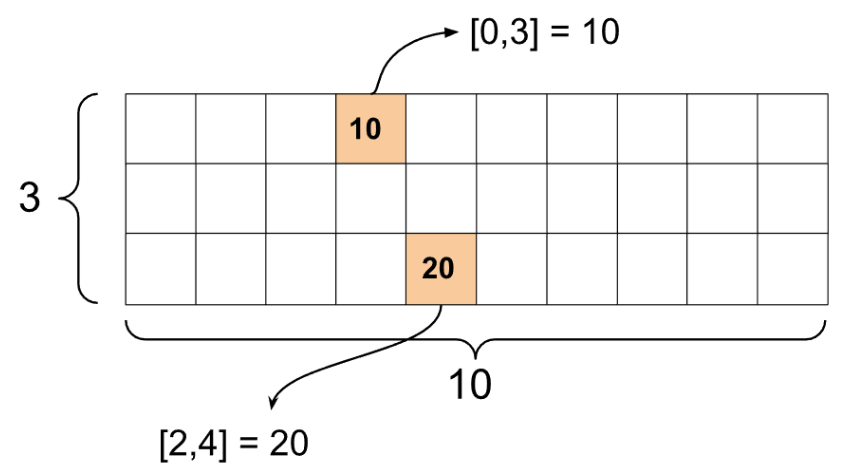

In [28]:
# creating dense tensors from sparse ones
st2 = tf.sparse.to_dense(st1)
st2

<tf.Tensor: shape=(3, 10), dtype=int32, numpy=
array([[ 0,  0,  0, 10,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 20,  0,  0,  0,  0,  0]], dtype=int32)>

In [ ]:
# creating sparse tensors from dense ones
st3 = tf.sparse.from_dense([[1, 0, 0, 8], 
                            [0, 0, 0, 0], 
                            [0, 0, 3, 0]])
print(st3)

SparseTensor(indices=tf.Tensor(
[[0 0]
 [0 3]
 [2 2]], shape=(3, 2), dtype=int64), values=tf.Tensor([1 8 3], shape=(3,), dtype=int32), dense_shape=tf.Tensor([3 4], shape=(2,), dtype=int64))


### 2. Tensor Attributes

When we are dealing with tensors, we need to be aware of the following attributes.
<table style = "width: 70%">  
    <tr> 
        <colgroup>
            <col span="1" style="width: 20%;">
            <col span="1" style="width: 50%;">
            <col span="1" style="width: 50%;">
        </colgroup> 
        <th style="background-color: green"><b><center>Attribute</th>  
        <th style="background-color: green">Meaning</th>  
        <th style="background-color: green">Code</b></center></th>  
    </tr>  
   <tr>
    <td>Shape</td>
    <td>The length (number of elements) of each of the dimensions of a tensor.</td>
    <td><code>tensor.shape</code></td>
  </tr>
  <tr>
    <td>Rank</td>
    <td>The number of tensor dimensions. A <var>scalar</var> has rank <kbd>0</kbd>, a <i>vector</i> has rank <kbd>1</kbd>, a <i>matrix</i> is rank <kbd>2</kbd>, a <i>tensor</i> has rank <kbd>n</kbd>.</td>
    <td><code>tensor.ndim</code></td>
  </tr>
  <tr>
    <td>Axis or dimension</td>
    <td>A particular dimension of a tensor.</td>
    <td><code>tensor[0], tensor[:, 1], ...</code></td>
  </tr>
  <tr>
    <td>Size</td>
    <td>The total number of items in the tensor.</td>
    <td><code>tf.size(tensor)</code></td>
  </tr>
    
     
</table>  


#### 2.1 Rank/Degree of Tensors
Another word for rank is degree, these terms simply mean the number of dimensions involved in the tensor. What we created above is a *tensor of rank 0*, also known as a scalar.

Now we'll create some tensors of higher degrees/ranks.

In [29]:
rank1_tensor = tf.Variable(["Test", "ok"], tf.string)
rank2_tensor = tf.Variable([["test", "ok"], ["test", "yes"]], tf.string)
rank3_tensor = tf.Variable([[["test", "ok"], ["test", "yes"]], [["test", "ok"], ["test", "yes"]]], tf.string)
rank4_tensor = tf.ones(shape = (2,2,3,4))

**To determine the rank** of a tensor we can call the following method.

In [30]:
print(tf.rank(rank1_tensor))
print(tf.rank(rank2_tensor))
print(tf.rank(rank3_tensor))
print(tf.rank(rank4_tensor))

tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)


In [31]:
rank4_tensor

<tf.Tensor: shape=(2, 2, 3, 4), dtype=float32, numpy=
array([[[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]],


       [[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]]], dtype=float32)>

#### 2.2 Size of tensor
Returns the size of a tensor i.e., number of items in it.

In [32]:
print(tf.size(rank1_tensor)) 
print(tf.size(rank2_tensor)) # i.e., 2 x 2
print(tf.size(rank3_tensor)) # i.e., 2 x 2 x 2
print(tf.size(rank4_tensor)) # i.e., 2 x 2 x 3 x 4

tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(48, shape=(), dtype=int32)


#### 2.3 Shape of Tensors
The shape of a tensor is simply the number of elements that exist in each dimension. TensorFlow will try to determine the shape of a tensor but sometimes it may be unknown. Before feeding the data into a Neural network, we need to set the shape of tensors before.

To **get the shape** of a tensor we use the shape attribute.


In [34]:
print(rank1_tensor.shape, rank2_tensor.shape, rank3_tensor.shape, rank4_tensor.shape)

(2,) (2, 2) (2, 2, 2) (2, 2, 3, 4)


##### Changing Shape
The number of elements of a tensor is the product of the sizes of all its shapes. There are often many shapes that have the same number of elements, making it convient to be able to change the shape of a tensor.

The example below shows how to change the shape of a tensor.

In [35]:
tensor1 = tf.ones([1,2,3])  # tf.ones() creates a shape [1,2,3] tensor full of ones
tensor2 = tf.reshape(tensor1, [2,3,1])  # reshape existing data to shape [2,3,1]
tensor3 = tf.reshape(tensor2, [3, -1])  # -1 tells the tensor to calculate the size of the dimension in that place
                                        # this will reshape the tensor to [3,2]

# The numer of elements in the reshaped tensor MUST match the number in the original

Now let's have a look at our different tensors.

In [36]:
print(tensor1)
print(tensor2)
print(tensor3)
# Notice the changes in shape

tf.Tensor(
[[[1. 1. 1.]
  [1. 1. 1.]]], shape=(1, 2, 3), dtype=float32)
tf.Tensor(
[[[1.]
  [1.]
  [1.]]

 [[1.]
  [1.]
  [1.]]], shape=(2, 3, 1), dtype=float32)
tf.Tensor(
[[1. 1.]
 [1. 1.]
 [1. 1.]], shape=(3, 2), dtype=float32)


##### Adding new dimension

In TensorFlow, `tf.newaxis` is used to increase the dimensions of a tensor by one. It is particularly useful when you want to add a new axis to a tensor, which effectively allows you to change its shape without changing the data.

In [37]:
rank_2_tensor = tf.constant([[10, 7],[3, 4]])
rank_2_tensor

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[10,  7],
       [ 3,  4]], dtype=int32)>

In [38]:
# adding in extra dimension to our 2 rank tensor
rank_3_tensor = rank_2_tensor[tf.newaxis]
print(rank_3_tensor,"\n")

# or

rank_3_tensor = tf.expand_dims(rank_2_tensor, axis=0)
print(rank_3_tensor)

tf.Tensor(
[[[10  7]
  [ 3  4]]], shape=(1, 2, 2), dtype=int32) 

tf.Tensor(
[[[10  7]
  [ 3  4]]], shape=(1, 2, 2), dtype=int32)


In [39]:
rank_3_tensor = rank_2_tensor[:,:,tf.newaxis]
print(rank_3_tensor,"\n")

# or

rank_3_tensor = tf.expand_dims(rank_2_tensor, axis=-1)
print(rank_3_tensor)

tf.Tensor(
[[[10]
  [ 7]]

 [[ 3]
  [ 4]]], shape=(2, 2, 1), dtype=int32) 

tf.Tensor(
[[[10]
  [ 7]]

 [[ 3]
  [ 4]]], shape=(2, 2, 1), dtype=int32)


In [40]:
rank_3_tensor = rank_2_tensor[:,tf.newaxis,:]
print(rank_3_tensor,"\n")

# or

rank_3_tensor = tf.expand_dims(rank_2_tensor, axis=1)
print(rank_3_tensor)

tf.Tensor(
[[[10  7]]

 [[ 3  4]]], shape=(2, 1, 2), dtype=int32) 

tf.Tensor(
[[[10  7]]

 [[ 3  4]]], shape=(2, 1, 2), dtype=int32)


In [41]:
rank_3_tensor[:,:, tf.newaxis]

<tf.Tensor: shape=(2, 1, 1, 2), dtype=int32, numpy=
array([[[[10,  7]]],


       [[[ 3,  4]]]], dtype=int32)>

#### 2.4 Axis or Dimension
A particular dimension of tensor.  <p> 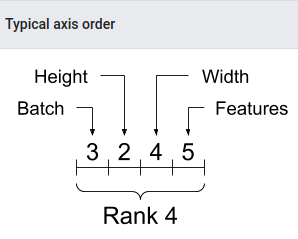 <br>
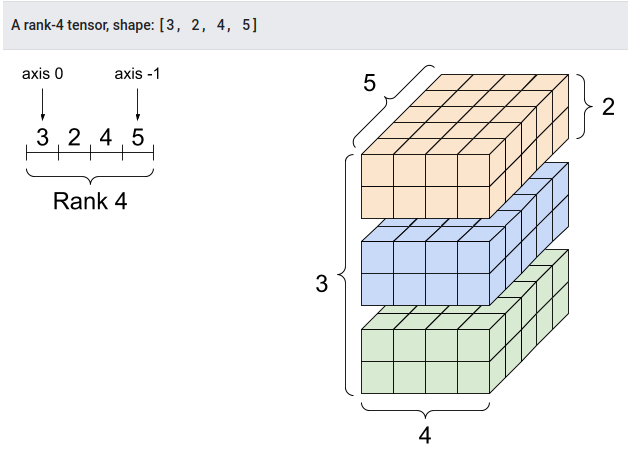

In [42]:
rank4 = tf.zeros(shape=(3,2,4,5))
rank4

<tf.Tensor: shape=(3, 2, 4, 5), dtype=float32, numpy=
array([[[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]],


       [[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]],


       [[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]]], dtype=float32)>

In [43]:
print("Elements along axis 0 of tensor:", rank4.shape[0])
print("Elements along axis 2 of tensor:", rank4.shape[2])
print("Elements along the last axis of tensor:", rank4.shape[-1], "which is the same as: ", rank4.shape[3])

Elements along axis 0 of tensor: 3
Elements along axis 2 of tensor: 4
Elements along the last axis of tensor: 5 which is the same as:  5


In [44]:
# some other attrubutes of tensors
print("Type of every element:", rank4.dtype)
print("Shape of tensor:", rank4.shape)
print("Total number of elements (3*2*4*5): ", tf.size(rank4).numpy())

Type of every element: <dtype: 'float32'>
Shape of tensor: (3, 2, 4, 5)
Total number of elements (3*2*4*5):  120


### 3. Indexing and Slicing Tensors
You may be familiar with the term "slice" in python and its use on lists, tuples etc. Well the slice operator can be used on tensors to select specific axes or elements.

When we slice or select elements from a tensor, we can use comma seperated values inside the set of square brackets. Each subsequent value refrences a different dimension of the tensor.

Ex: ```tensor[dim1, dim2, dim3, ...]```

I've included a few examples that will hopefully help illustrate how we can manipulate tensors with the slice operator.

In [45]:
rank_4_tensor = tf.constant(np.arange(1,73), shape=(3,2,3,4))
rank_4_tensor

<tf.Tensor: shape=(3, 2, 3, 4), dtype=int64, numpy=
array([[[[ 1,  2,  3,  4],
         [ 5,  6,  7,  8],
         [ 9, 10, 11, 12]],

        [[13, 14, 15, 16],
         [17, 18, 19, 20],
         [21, 22, 23, 24]]],


       [[[25, 26, 27, 28],
         [29, 30, 31, 32],
         [33, 34, 35, 36]],

        [[37, 38, 39, 40],
         [41, 42, 43, 44],
         [45, 46, 47, 48]]],


       [[[49, 50, 51, 52],
         [53, 54, 55, 56],
         [57, 58, 59, 60]],

        [[61, 62, 63, 64],
         [65, 66, 67, 68],
         [69, 70, 71, 72]]]])>

In [46]:
# Get the first 2 elements of each dimension
rank_4_tensor[:1]

<tf.Tensor: shape=(1, 2, 3, 4), dtype=int64, numpy=
array([[[[ 1,  2,  3,  4],
         [ 5,  6,  7,  8],
         [ 9, 10, 11, 12]],

        [[13, 14, 15, 16],
         [17, 18, 19, 20],
         [21, 22, 23, 24]]]])>

In [47]:
rank_4_tensor[:1, :1]

<tf.Tensor: shape=(1, 1, 3, 4), dtype=int64, numpy=
array([[[[ 1,  2,  3,  4],
         [ 5,  6,  7,  8],
         [ 9, 10, 11, 12]]]])>

In [48]:
rank_4_tensor[:1, :1, :1]

<tf.Tensor: shape=(1, 1, 1, 4), dtype=int64, numpy=array([[[[1, 2, 3, 4]]]])>

In [49]:
rank_4_tensor[:1, :1, :1, :1]

<tf.Tensor: shape=(1, 1, 1, 1), dtype=int64, numpy=array([[[[1]]]])>

In [50]:
rank_4_tensor[:2, :2, :2, :2]

<tf.Tensor: shape=(2, 2, 2, 2), dtype=int64, numpy=
array([[[[ 1,  2],
         [ 5,  6]],

        [[13, 14],
         [17, 18]]],


       [[[25, 26],
         [29, 30]],

        [[37, 38],
         [41, 42]]]])>

In [51]:
# Creating a 2D tensor
matrix = [[1,2,3,4,5],
          [6,7,8,9,10],
          [11,12,13,14,15],
          [16,17,18,19,20]]

tensor = tf.Variable(matrix, dtype=tf.int32)
print(tensor.numpy(),"\n")
print("rank = ",tf.rank(tensor).numpy(),"\n")
print("shape = ",tensor.shape)

[[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [11 12 13 14 15]
 [16 17 18 19 20]] 

rank =  2 

shape =  (4, 5)


In [52]:
print(tensor[-1])

tf.Tensor([16 17 18 19 20], shape=(5,), dtype=int32)


In [53]:
print(tensor[:, -2])

tf.Tensor([ 4  9 14 19], shape=(4,), dtype=int32)


In [54]:
# Now lets select some different rows and columns from our tensor
row1 = tensor[0]  # selects the first row
print(f"Row 1: {row1}\n")

three = tensor[0,2]  # selects the 3rd element from the 1st row
print(f"Third element [0,2]: {three.numpy()} \n")  # -> 3

column1 = tensor[:, 0]  # selects the first column
print(f"Column 1: {column1}\n")

row_2_and_4 = tensor[1::2]  # selects second and fourth row [start : stop : step]
print(f"2nd and 4th row: \n{row_2_and_4} \n")

row_2_and_3_and_4 = tensor[1:4:1]  # selects second, third and fourth row
print(f"2nd and 3rd and 4th row: \n{row_2_and_3_and_4 } \n")

column_2_and_3 = tensor[:, 1:3]
print(f"Column 2 and 3: \n{column_2_and_3} \n")

column_2_and_3_in_row_2_and_3 = tensor[1:3, 1:3]  
print(f"Column 2 and 3 in 2nd and 3rd row : \n{column_2_and_3_in_row_2_and_3}")


Row 1: [1 2 3 4 5]

Third element [0,2]: 3 

Column 1: [ 1  6 11 16]

2nd and 4th row: 
[[ 6  7  8  9 10]
 [16 17 18 19 20]] 

2nd and 3rd and 4th row: 
[[ 6  7  8  9 10]
 [11 12 13 14 15]
 [16 17 18 19 20]] 

Column 2 and 3: 
[[ 2  3]
 [ 7  8]
 [12 13]
 [17 18]] 

Column 2 and 3 in 2nd and 3rd row : 
[[ 7  8]
 [12 13]]


### 4. Manipulating tensors (Tensor operation)
#### 4.1 **Basic Operation** <br>
`+` &ensp; `-` &ensp; `*` &ensp; `/` &ensp; `abs`

In [55]:
tensor = tf.constant([[1, 2], [4, 5]])
tensor

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[1, 2],
       [4, 5]], dtype=int32)>

In [56]:
tensor + 10

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[11, 12],
       [14, 15]], dtype=int32)>

In [57]:
tensor - 10

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[-9, -8],
       [-6, -5]], dtype=int32)>

In [58]:
tensor * 10

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[10, 20],
       [40, 50]], dtype=int32)>

In [59]:
tensor / 10

<tf.Tensor: shape=(2, 2), dtype=float64, numpy=
array([[0.1, 0.2],
       [0.4, 0.5]])>

In [60]:
tf.abs(tensor - 10)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[9, 8],
       [6, 5]], dtype=int32)>

#### 4.2 Matrix Multiplication
In ML, matrix multiplication is one of the most common tensor operation. It can be done using `tf.matmul(a, b`)

In [61]:
print(tensor)

tf.Tensor(
[[1 2]
 [4 5]], shape=(2, 2), dtype=int32)


In [62]:
tf.matmul(tensor, tensor)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 9, 12],
       [24, 33]], dtype=int32)>

In [63]:
# or @ operator also do the matrix multiplication
tensor @ tensor

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 9, 12],
       [24, 33]], dtype=int32)>

In [64]:
# element wise operation
tensor * tensor 

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 1,  4],
       [16, 25]], dtype=int32)>

#### 4.3 Transpose vs reshape

In [65]:
x = tf.constant([[10,7],[3,4],[2,5]])
print(x,"\n\n", tf.transpose(x), "\n\n", tf.reshape(x, shape = (2,3)))

tf.Tensor(
[[10  7]
 [ 3  4]
 [ 2  5]], shape=(3, 2), dtype=int32) 

 tf.Tensor(
[[10  3  2]
 [ 7  4  5]], shape=(2, 3), dtype=int32) 

 tf.Tensor(
[[10  7  3]
 [ 4  2  5]], shape=(2, 3), dtype=int32)


#### 4.4 Aggregrating functions
- Maximum
- Minimum
- Mean
- Sum
- Standard Deviation
- Variance
- Square
- Sqrt
- Log etc.
  

In [66]:
e = tf.constant(np.random.randint(0,100, size = 32), shape = (2,16))
e

<tf.Tensor: shape=(2, 16), dtype=int64, numpy=
array([[14, 26, 79, 89, 70, 69, 68,  8, 84,  3, 18, 50, 49, 55, 20, 29],
       [23,  8,  9, 44, 66, 86, 34, 95, 16, 74, 32,  8, 62,  9, 61, 46]])>

In [67]:
# minimum
print(tf.reduce_min(e).numpy())
print(tf.reduce_min(e, axis = 1).numpy())
print(tf.reduce_min(e, axis = 0).numpy())

3
[3 8]
[14  8  9 44 66 69 34  8 16  3 18  8 49  9 20 29]


In [68]:
# we can also get the position of the minimum
print(tf.argmin(e, axis = 1).numpy())

[9 1]


The term "reduce" refers to reducing the number of dimensions by aggregating along a specific axis or across all axes. <br>
Reduces `input_tensor` along the dimensions given in axis. Unless `keepdims` is true, the rank of the tensor is reduced by $1$ for each of the entries in axis, which must be unique. <br>If keepdims is true, the reduced dimensions are retained with length $1$.

In [69]:
# maximum
print(tf.reduce_max(e, keepdims=True).numpy()) # keepdims = True for keeping the dimension 
print(tf.reduce_max(e, axis = 1).numpy())
print(tf.reduce_max(e, axis = 0).numpy())


[[95]]
[89 95]
[23 26 79 89 70 86 68 95 84 74 32 50 62 55 61 46]


In [70]:
# position of maximum
print(tf.argmax(e, axis = 1).numpy())

[3 7]


In [71]:
# mean
print(tf.reduce_mean(e).numpy())
print(tf.reduce_mean(e, axis = 1).numpy())
print(tf.reduce_mean(e, axis = 0).numpy())

43
[45 42]
[18 17 44 66 68 77 51 51 50 38 25 29 55 32 40 37]


In [72]:
# sum
print(tf.reduce_sum(e).numpy())
print(tf.reduce_sum(e, axis = 1).numpy())

1404
[731 673]


In [73]:
# standard deviation
## need to changing dtype to float or complex before calculating std. int won't work
print(tf.math.reduce_std(tf.cast(e, dtype = tf.float32)).numpy())
print(tf.math.reduce_std(tf.cast(e, dtype = tf.float32), axis = 1).numpy())

28.208763
[27.997139 28.302979]


In [74]:
# variance
print(tf.math.reduce_variance(tf.cast(e, dtype = tf.float32)).numpy())
print(tf.math.reduce_variance(tf.cast(e, dtype = tf.float32), axis = 1).numpy())

795.7344
[783.83984 801.0586 ]


In [75]:
# squaring, log and other functions
g = tf.range(1,20,2)
g

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19], dtype=int32)>

In [76]:
tf.square(g)

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([  1,   9,  25,  49,  81, 121, 169, 225, 289, 361], dtype=int32)>

In [77]:
# need to change dtype to float or complex before calculating sqrt. int won't work
tf.math.sqrt(tf.cast(g, dtype = tf.float32))

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([1.       , 1.7320508, 2.2360678, 2.6457512, 3.       , 3.3166246,
       3.6055512, 3.8729832, 4.1231055, 4.3588986], dtype=float32)>

In [78]:
tf.math.log(tf.cast(g, dtype = tf.float32))

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([0.       , 1.0986123, 1.609438 , 1.9459102, 2.1972246, 2.3978953,
       2.5649493, 2.7080503, 2.8332133, 2.944439 ], dtype=float32)>

### 5. Squeezing the tensor
Removes the dimensions of size one from the shape of the tensor

In [79]:
f = tf.constant(2, shape = (1,1,1,2))
f

<tf.Tensor: shape=(1, 1, 1, 2), dtype=int32, numpy=array([[[[2, 2]]]], dtype=int32)>

In [80]:
f_squeezed = tf.squeeze(f)
f_squeezed

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([2, 2], dtype=int32)>